In [ ]:
from osgeo import gdal
import numpy as np
import matplotlib.pyplot as plt
dem_file_path = "/content/dem.tif"

In [ ]:
dem_dataset = gdal.Open(dem_file_path)
if dem_dataset is None:
    print("Could not open the DEM file.")
    exit()

# خواندن اطلاعات ارتفاعی از فایل DEM
dem_array = dem_dataset.GetRasterBand(1).ReadAsArray()

# Curvature Map

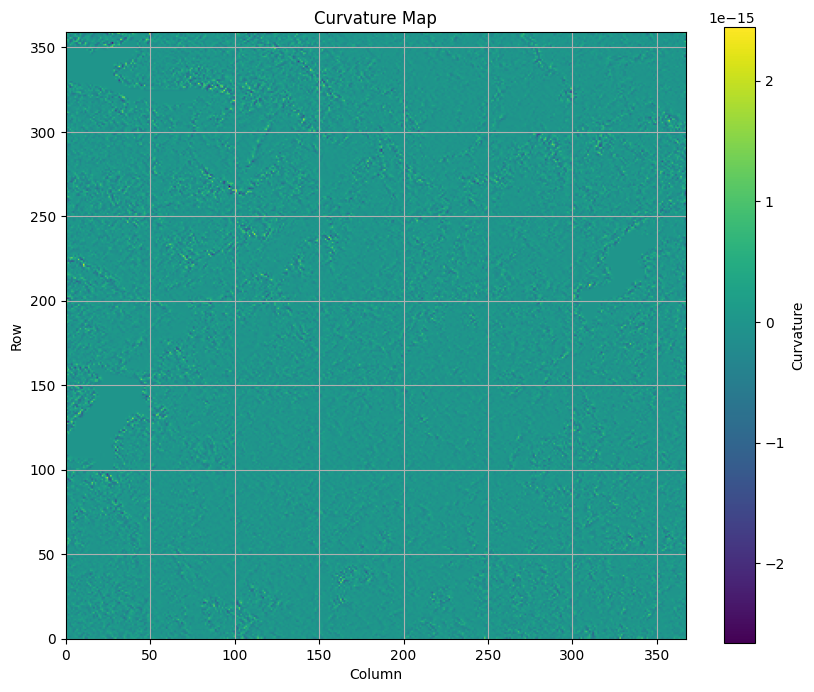

In [ ]:
x, y = np.gradient(dem_array)
slope = np.sqrt(x**2 + y**2)
aspect = np.arctan2(-x, y)
curvature = np.gradient(np.cos(aspect) * slope, axis=0) + np.gradient(np.sin(aspect) * slope, axis=1)

plt.figure(figsize=(10, 8))
plt.imshow(curvature, cmap='viridis', extent=(0, dem_array.shape[1], 0, dem_array.shape[0]))
plt.colorbar(label='Curvature')
plt.title('Curvature Map')
plt.xlabel('Column')
plt.ylabel('Row')
plt.grid(True)
plt.show()